In [90]:
import pandas as pd
house_price = pd.read_csv('Boston.csv')
house_price.head() 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


EDA


In [91]:
house_price.shape

(506, 14)

In [92]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [93]:
house_price.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


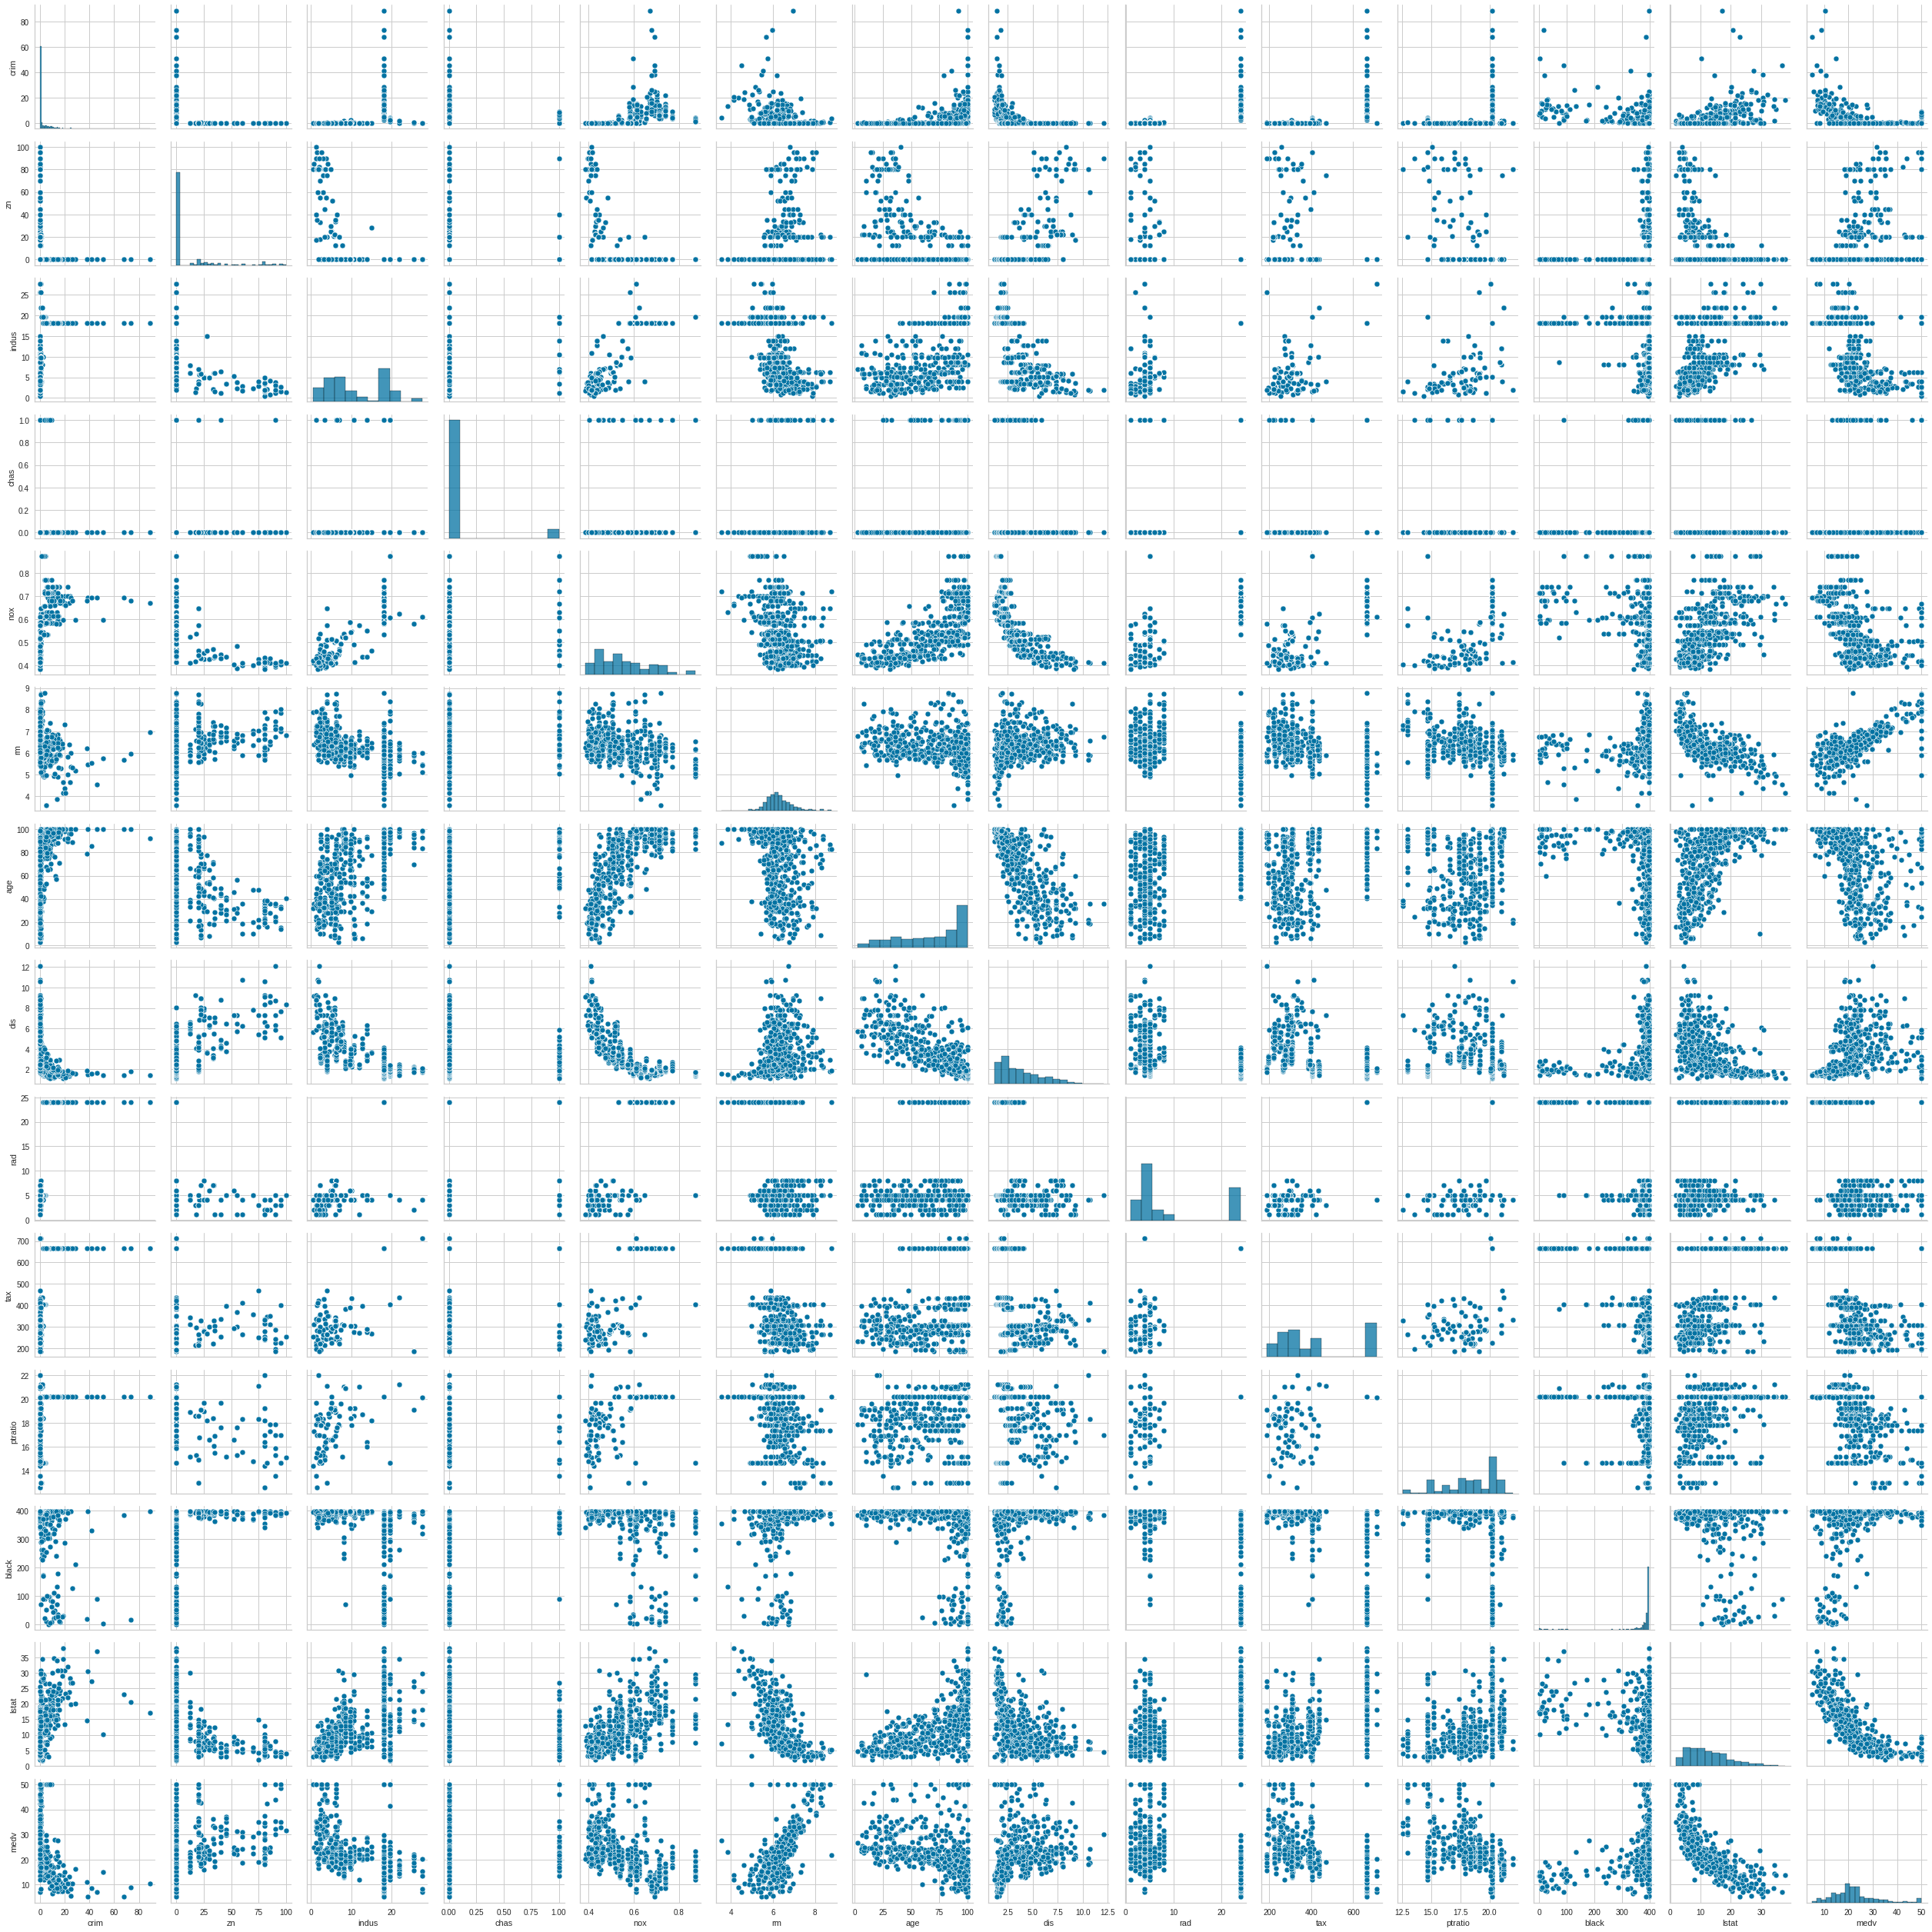

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Calculate and show pairplot
sns.pairplot(house_price, height=2.5)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


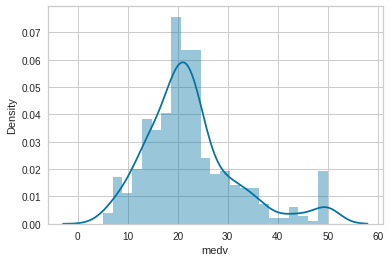

In [95]:
sns.distplot(house_price.medv);

In [96]:
house_price.medv.skew()
# Negative skew refers to a longer or fatter tail on the left side of the distribution, 
# while positive skew refers to a longer or fatter tail on the right.

1.1080984082549072

In [97]:
print("Skewness: {}".format(house_price.medv.skew()))
print("Kurtosis: {}".format(house_price.medv.kurt()))

# Kurtosis is a measure of the "tailedness" of distribrution

Skewness: 1.1080984082549072
Kurtosis: 1.495196944165818


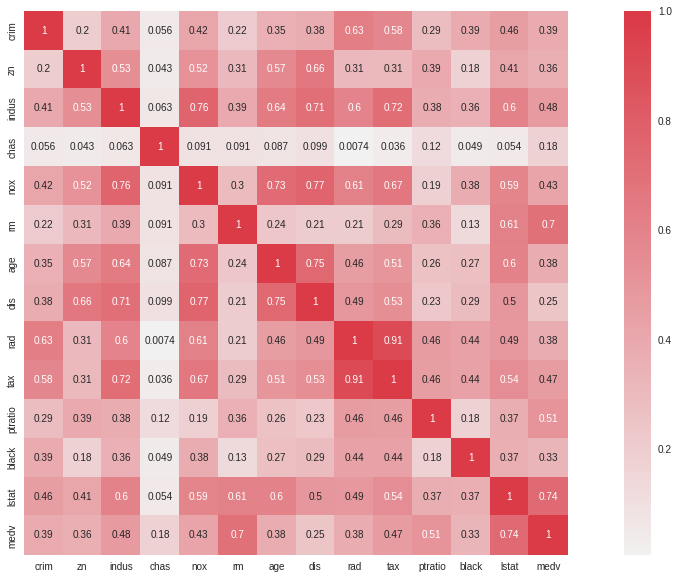

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10) ) 
cmap=sns.diverging_palette (500, 10, as_cmap= True)
sns.heatmap (house_price.corr().abs(),cmap=cmap, center=0, square=True, annot=True)

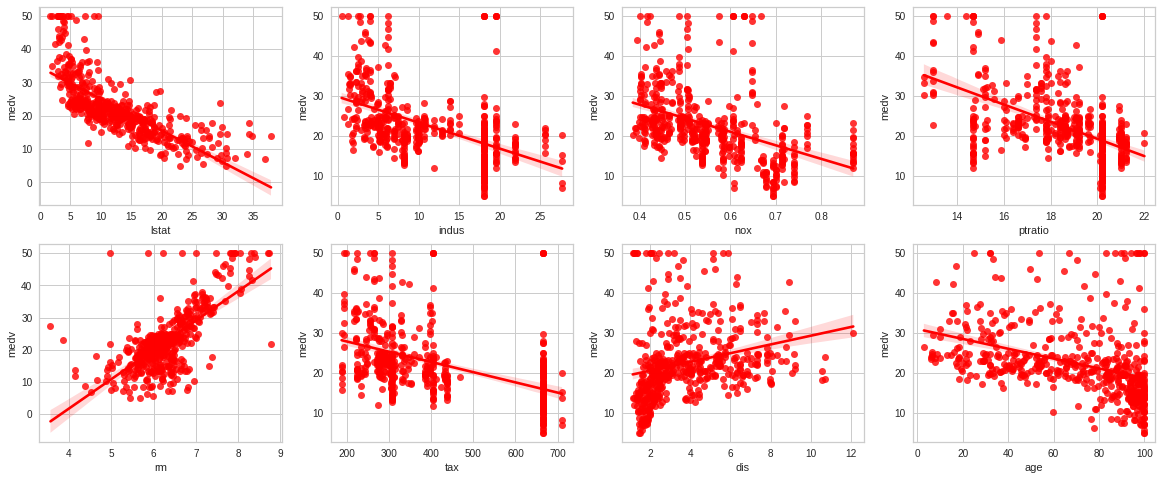

In [99]:
#Correlation Matrix
fig, axs =plt.subplots (nrows=2, ncols=4, figsize= (20,8) )
cols = ['lstat', 'indus', 'nox', 'ptratio', 'rm', 'tax', 'dis', 'age']
for col, ax in zip(cols, axs.flat):
  sns.regplot(x=house_price[col],y= house_price['medv'], color='red', ax=ax)  

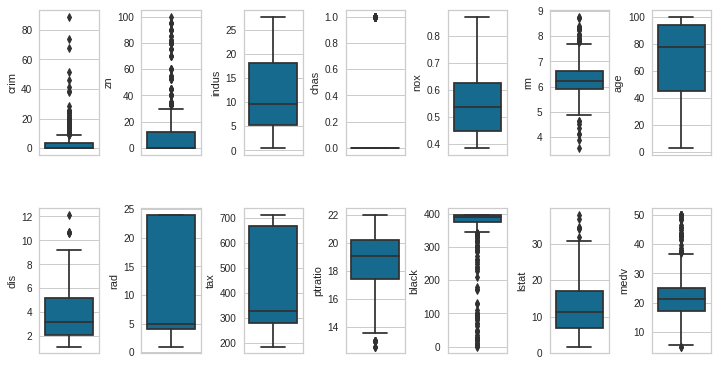

In [100]:
#scatter plot
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten ()
for k,v in house_price.items():
  sns.boxplot(y=k, data=house_price, ax=axs[index])
  index += 1
  
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [101]:
house_price = house_price[-((house_price['rm'] >= 8.5) | (house_price['rm'] < 4))]

In [102]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
target = house_price['medv']
features = house_price.drop ('medv', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split (features, target, test_size= 0.3)
scaler = MinMaxScaler (feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)

#Baseline SVR Model
regressor = SVR(kernel= 'rbf')
regressor.fit(X_train, Y_train)
regressor.score(X_test, Y_test)



0.578566413007607

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
K=15
parameters= [{'kernel': ['rbf'], 'gamma' : [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9], 'C': [1,10,100,1000,10000]}]
print("Tuning hyper-parameters")
scorer = make_scorer(mean_squared_error, greater_is_better=False)
svr= GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K, scoring=scorer)
svr.fit(X_train, Y_train)
print("Grid scores on training set:") 
means= svr.cv_results_['mean_test_score']
stds= svr.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svr.cv_results_['params']):
  print("%0.3f (+/-%0.03f) for %r"% (mean, std*2, params))

Tuning hyper-parameters
Grid scores on training set:
-79.934 (+/-61.042) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
-78.484 (+/-61.189) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
-67.784 (+/-61.764) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-46.470 (+/-57.050) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
-40.837 (+/-53.271) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
-34.524 (+/-46.507) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
-33.645 (+/-45.829) for {'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}
-33.023 (+/-45.168) for {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}
-78.481 (+/-61.189) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
-67.581 (+/-61.665) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
-44.706 (+/-56.487) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
-24.866 (+/-35.297) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
-20.945 (+/-32.186) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
-18.524 (+/-29.914) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
-18.040 (+/-29.049) for {'C': 10,

In [104]:
#Best parameter at C=1000, gamma=0.9, kernel='rbf'
regressor_tuned = SVR(kernel = 'rbf', C=1000, gamma=0.9)
regressor_tuned.fit(X_train, Y_train)
regressor_tuned.score(X_test, Y_test)


0.8471861902947697

In [105]:
from yellowbrick.regressor import ResidualsPlot

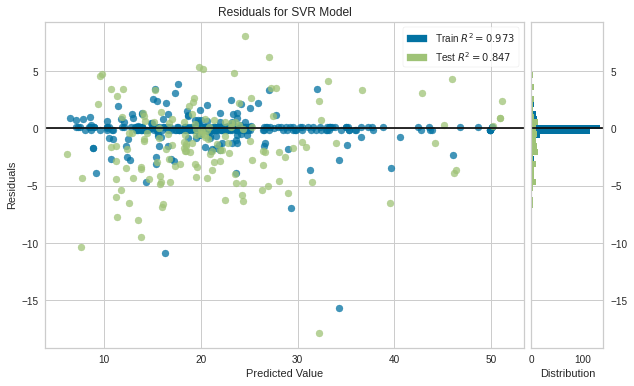

In [106]:
plt.figure(figsize=(10,6))
visualizer = ResidualsPlot(regressor_tuned)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test,Y_test)
visualizer.show();

In [107]:
#evaluation of model
from sklearn import metrics
import numpy as np


In [108]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()
# Train the model using the training sets 
reg.fit(X_train, Y_train)

SVR()

In [109]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [110]:
print('R^2:',metrics.r2_score(Y_train, Y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

R^2: -0.7588921861527496
Adjusted R^2: -0.8269445624027072
MAE: 8.931452651160104
MSE: 138.7122993014369
RMSE: 11.777618575138053


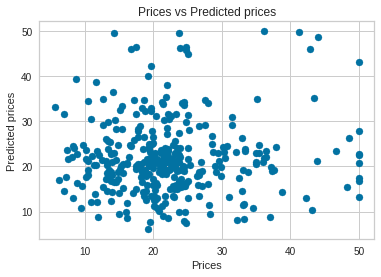

In [111]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

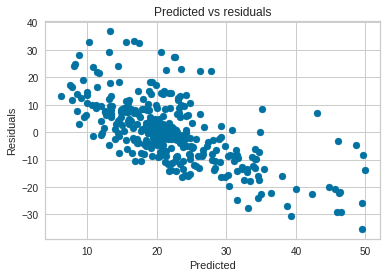

In [112]:
# Checking residuals
plt.scatter(Y_pred,Y_train-Y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [113]:
# Predicting Test data with the model
Y_test_pred = reg.predict(X_test)
# Model Evaluation
acc_svm = metrics.r2_score(Y_test, Y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, Y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

R^2: 0.578566413007607
Adjusted R^2: 0.5385763646068691
MAE: 3.7677090040025716
MSE: 37.724232462964174
RMSE: 6.142005573341999


In [114]:
# Import XGBoost Regressor
from xgboost import XGBRegressor
from sklearn import metrics
import numpy as np

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, Y_train)

[06:35:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [115]:
# Model prediction on train data
Y_pred = reg.predict(X_train)

In [116]:
# Model Evaluation
print('R^2:',metrics.r2_score(Y_train, Y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

R^2: 0.9771327248109553
Adjusted R^2: 0.9762479790447125
MAE: 1.0402266894749235
MSE: 1.8033921267051616
RMSE: 1.3429043624566723


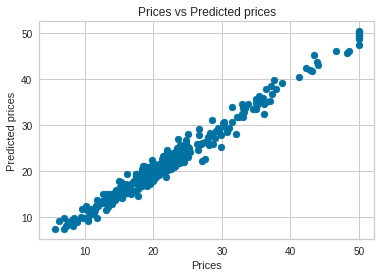

In [117]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

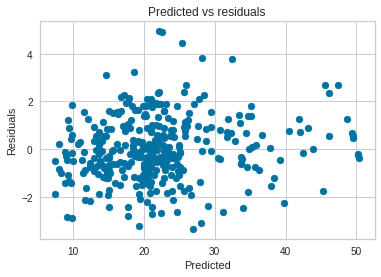

In [118]:
# Checking residuals
plt.scatter(Y_pred,Y_train-Y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [119]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [120]:
# Model Evaluation
acc_xgb = metrics.r2_score(Y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, y_test_pred)) 
print('MSE:',metrics.mean_squared_error(Y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))

R^2: 0.8622784577157772
Adjusted R^2: 0.849209990199756
MAE: 2.570268224248823
MSE: 12.328014749288958
RMSE: 3.511127276144936
